<a href="https://colab.research.google.com/github/GamingMike45/DataScienceCommittee/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), cool 2D arrays

# how to use google drive #
from google.colab import drive
drive.mount('/content/drive')      #attaches itself to your google drive

# takes the training data spreadsheet (csv) and puts it into two panda arrays #
trainData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
testData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")


"""The funtions bellow act on the data"""
# just prints the data
def printData():
  #pd.set_option("display.max_rows", None)
  print(f"Train data=\n{trainData}")
  print(f"Test data=\n{testData}")

# makes the column Family column which is the sum of Sibsp (siblingings/spouses) and Parch (Parens/Children)
def family(trainData, testData):
  trainData["Family"] = trainData["SibSp"] + trainData["Parch"]
  testData["Family"] = testData["SibSp"] + testData["Parch"]

  print("   Created 'Family' column.")


# makes the column Last Name column which is just the peroson last name
def lastName(trainData, testData):
  trainData["LastName"] = trainData["Name"].str.split(',').str[0]
  testData["LastName"] = testData["Name"].str.split(',').str[0]

  print("   Created 'LastName' column.")

def makeFamCodes(trainData, testData):
  trainNameSet = set(trainData["LastName"])
  testNameSet = set(testData["LastName"])

  print(f"THIS IS MY SET {trainNameSet}")

  trainData["FamCode"] = ''
  testData["FamCode"] = ''

  i = 0
  for name in trainNameSet:
    trainData["FamCode"] += trainData["LastName"].apply(lambda s: str(i) if s == name else "")

    i = i + 1

  for name in testNameSet:
    testData["FamCode"] += testData["LastName"].apply(lambda s: str(i) if s == name else "")

    i = i + 1


# FILLING in NULLS #
def wrangleMean(trainData, testData):
  trainData["Cabin"] = trainData["Cabin"].fillna('?')
  testData["Cabin"] = testData["Cabin"].fillna('?')

  trainData["Age"] = trainData["Age"].fillna(trainData["Age"].mean())
  testData["Age"] = testData["Age"].fillna(testData["Age"].mean())

  trainData["Fare"] = trainData["Fare"].fillna(trainData["Fare"].mean())
  testData["Fare"] = testData["Fare"].fillna(testData["Fare"].mean())

  print("   Nulls Filled.")

# Remove rows with nulls in them #
def wrangleDelNull(trainData, testData):
  trainData.dropna(inplace=True)
  testData.dropna(inplace=True)


from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
# forces all numeric data to be withing 0 to 1
#has optional param that acccepts a list of columns to ignore
def wrangleNorm(trainData, testData, exclude=[]):
  # change this to do all numeric columns!
  tempDF = testData.select_dtypes(include=np.number)
  columns = []


  # this is for if you want to exclude a ceetain column (feature)
  # it only adds colmuns that are not in th einclude list tot he columns list
  for col in tempDF.columns:
    if (col not in exclude):
      columns = columns + [col]

  #iterates through every numeric column
  for col in columns:
      trainData[col] = (trainData[col] - trainData[col].min()) / (trainData[col].max() - trainData[col].min())
      testData[col] = (testData[col] - testData[col].min()) / (testData[col].max() - testData[col].min())

  print("   Normalized numeric columns.")



"""The functions below display information about the data"""
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
# This predicts importance of our features #
def predictImportance(trainData):
    tfDataSet = tfdf.keras.pd_dataframe_to_tf_dataset(trainData, label='Survived')

    model = tfdf.keras.RandomForestModel()
    model.fit(tfDataSet)

    print(model.summary())

# displays correlation data give a training data set #
from pandas.plotting import scatter_matrix
def displayCorrelations(trainData):
                                          #Correlation values
    print(f"\nCorrelation Summary:\nPearson Coef:{trainData.corr(method = 'pearson')}\n\nKendall Coef:{trainData.corr(method = 'kendall')}\n\nSpearman Coef:{trainData.corr(method = 'spearman')}\n")

    #big corrolation chart
    trainData.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
    plt.tight_layout(pad=2)
    plt.show()
    # histograms
    trainData.hist()
    plt.tight_layout(pad=2)
    plt.show()
    # scatter plot matrix
    scatter_matrix(trainData)
    plt.tight_layout(pad=.1)
    plt.show()

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# we probably dont need all these #
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
# This tests the models #
def testModels(trainData,features):
    print(f"\nTesting models based on: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])

    names = ["RandomForest200",
         "LinearSVC",
         "MultinomialNB",
         "Logistic",
         "KNN5",
         "SVCLinear",
         "SVCgamma2",
         "DecisionTree5",
         "RandomForest5-10",
         #"MLP-2000-1000-500-100",
         "AdaBoost",
         "HistGradientBoost"
        ]

    abrevNames = ["RF2",
         "LSVC",
         "MNB",
         "Log",
         "KNN5",
         "SVCL",
         "SVCg",
         "DT5",
         "RF51",
         #"MLP",
         "AB",
         "HGB"
        ]

    models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(max_iter=1000, dual=False),
        MultinomialNB(),
        LogisticRegression(random_state=0),
        KNeighborsClassifier(5),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[])
    ]

    results = []

    i = 0
    for model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        model_name = names[i]
        i = i + 1
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    plt.boxplot(results, labels=abrevNames)
    plt.title('Algorithm Comparison')
    plt.show()



"""The functions below predict and prepare predicitons for submissions"""
# Only predicts on ONE model
def outPrediction(trainData,testData):
    # what we want to predict #
    y = trainData["Survived"]

    # features that mater!! #
    features = ["Sex","Fare","Age"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    model = HistGradientBoostingClassifier(categorical_features=[])
    model.fit(X, y)

    cv_results = cross_val_score(model, X, y, scoring='accuracy')
    result = cv_results
    name = "Hist"
    print()
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print()

    predictions = model.predict(XTest)
    return predictions


def outputPredictionsList(trainData,testData,features):
    print(f"   Using Features: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    models = [
        RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0),
        LinearSVC(max_iter=1500, dual=False),
        MultinomialNB(),
        LogisticRegression(random_state=0),
        KNeighborsClassifier(5),
        SVC(kernel="linear", C=2),
        SVC(gamma=0.5, C=2),
        DecisionTreeClassifier(max_depth=15),
        RandomForestClassifier(max_depth=15, n_estimators=30, max_features=3),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[])
    ]

    predictionsList = []

    for model in models:
        model.fit(X, y)
        prediction = model.predict(XTest)
        predictionsList.append(prediction)

    return np.array(predictionsList)

# Takes each models predictions for each person and takes the average to round to the most likely outcome
def outputConcensus(preditcionsList):
  print("   Making Concensus...")
  concensus = np.mean(predictionsList, axis=0)
  #print(concensus)
  return (np.rint(concensus)).astype(int)

# Create an output dataframe and write it to csv file #
def modelToCSV(testData,prediction):
    output = pd.DataFrame({'PassengerId': testData.PassengerId, "Survived": prediction})
    output.to_csv('submission.csv', index=False)

    # just so we can see the submission in the console #
    submission = pd.read_csv('submission.csv')
    print(f"CSV submission conents:\n{submission}")

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Method Calls


Wrangling...
   Nulls Filled.
   Normalized numeric columns.

Creating Features...
   Created 'Family' column.
   Created 'LastName' column.
THIS IS MY SET {'Jonsson', 'Olsen', 'Maisner', 'Novel', 'Jensen', 'Somerton', 'Graham', 'Pears', 'Dodge', 'Milling', 'Padro y Manent', 'Kalvik', 'Ling', 'Bowerman', 'Robert', 'Baxter', 'Mangan', 'Shelley', 'Reuchlin', 'Cumings', 'Petranec', 'Ohman', 'Webber', 'Mallet', 'Ibrahim Shawah', 'Rothes', 'Johanson', 'Caram', 'Hansen', 'Jardin', 'Crease', 'Andrew', 'Pettersson', 'Renouf', 'Markun', 'Sobey', 'Perreault', 'Weir', 'Scanlan', 'Spencer', 'McCormack', 'Allison', 'Albimona', 'Kantor', 'Petroff', 'Ross', 'Thomas', 'Bateman', 'Morrow', 'Lindahl', 'Coutts', 'McGovern', 'Vovk', 'Gilnagh', 'Newell', 'Rood', 'Ringhini', 'Eitemiller', 'Jermyn', 'Ball', 'Smith', 'Rice', 'Lester', 'Ayoub', 'Seward', 'Willey', 'Birkeland', 'Boulos', 'Foreman', 'Mitchell', 'Otter', 'Ward', 'Douglas', 'Pinsky', "O'Brien", 'Sundman', 'Berglund', 'Cameron', 'Hippach', 'Widegr

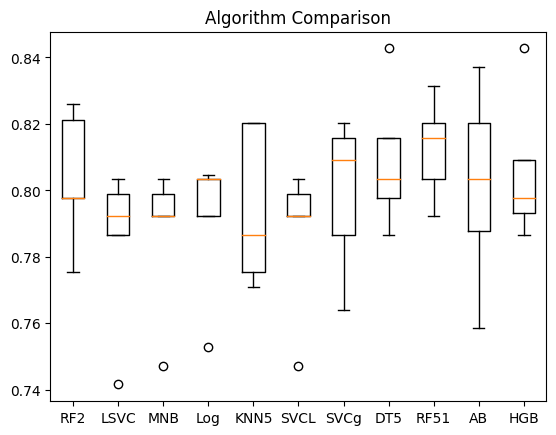


Predicting...
   Using Features: ['Sex', 'Fare', 'Age', 'Family', 'Pclass', 'Embarked']
   Making Concensus...
CSV submission conents:
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0


In [ ]:
# METHOD CALLS #

#displayCorrelations(trainData)

# WRANGLING #
print('\nWrangling...')
wrangleMean(trainData, testData)
#wrangleDelNull(trainData, testData)
wrangleNorm(trainData, testData, exclude=["PassengerId"])
#printData()

# FEATURE ENGINEERING #
print('\nCreating Features...')
family(trainData, testData)
lastName(trainData, testData)
makeFamCodes(trainData, testData)
printData()

# FEATURE SETS #
features = ["Sex","Fare","Age","SibSp","Parch"]
features1 = ["Sex","Fare","Age","Family"]
features2 = ["Sex","Fare","Age","Family","Pclass","Embarked"]
featuresALL = ["Sex","Fare","Age","Family","Pclass","Name","Ticket","Cabin","Embarked","PassengerId"]

# TESTING #
#predictImportance(trainData)
testModels(trainData,features)
#testModels(trainData, features1)
#testModels(trainData, features2)
#testModels(trainData, featuresALL)

# For  predictiing & submitting #
print('\nPredicting...')
#prediction = outPrediction(trainData, testData)
predictionsList = outputPredictionsList(trainData,testData,features2)
#print(predictionsList)
concensus = outputConcensus(predictionsList)
#print(concensus)
modelToCSV(testData,concensus)